In [1]:
# import requests
# import os

# # 모델의 raw URL을 사용합니다.
# url = 'https://github.com/NostalgicJ/Quantum_2023/raw/test/RNN_Practice/10/saved_models/NVspin_SimpleRNN_model.h5'
# response = requests.get(url, allow_redirects=True)

# # 현재 코드 파일이 위치한 디렉토리의 상위 디렉토리로 이동
# parent_directory = os.path.join(os.getcwd(), '..')

# # 상위 디렉토리에 새로운 디렉토리 생성
# new_directory = os.path.join(parent_directory, 'using_models')

# if not os.path.exists(new_directory):
#     os.makedirs(new_directory)

# # 모델 저장하기
# with open('../using_models/NVspin_SimpleRNN_model.h5', 'wb') as f:
#     f.write(response.content)
    

In [2]:
from tensorflow.keras.models import load_model

loaded_model = load_model('saved_models/NVspin_GRU_model.h5')

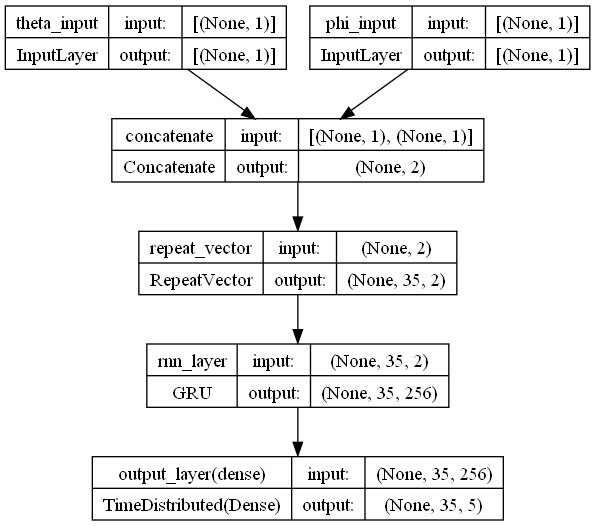

In [3]:
from tensorflow.keras.utils import plot_model
import os

# 저장할 디렉토리 생성
model_dir = 'model_plot'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# 원하는 디렉토리 지정
file_name = 'GRU_model_plot.png'
full_path = os.path.join(model_dir, file_name)

# 모델 구조 시각화
plot_model(loaded_model, to_file=full_path, show_shapes=True, show_layer_names=True)


In [4]:
import numpy as np

# 새로운 theta와 phi 값 정의
new_theta = np.array([np.pi/2]).reshape(-1, 1)  # 예시 값
new_phi = np.array([np.pi]).reshape(-1, 1)    # 예시 값

# 모델로 예측
predicted_sequence = loaded_model.predict([new_theta, new_phi])

# 결과 출력 (예측값은 확률 분포로 나올 것이므로 가장 높은 확률을 가진 인덱스를 선택)
predicted_sequence_indices = np.argmax(predicted_sequence, axis=-1)
print(predicted_sequence_indices[0])

1/1 [==============================] - 0s 411ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 2 4 4 1 1 3 3 2 2 4 4 1 1 3 2 3]


In [5]:
import pandas as pd

# 깃허브에서 CSV 파일 다운로드
csv_url = "https://github.com/NostalgicJ/Quantum_2023/raw/test/Data/using/dt_2.6/ByAstar_dt_2.6_0911.csv"
df = pd.read_csv(csv_url)

shuffled_data = df.sample(frac=1).reset_index(drop=True)
shuffled_data.head()

,gate length,Theta,Phi,dt,combination,total time,computing time
0,19,1.362109,1.754907,2.6,"[1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 0, ...",49.4,1799.727353
1,25,2.440894,3.075768,2.6,"[2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 3, ...",65.0,196.453394
2,10,1.059714,0.987486,2.6,"[1, 1, 3, 3, 2, 2, 4, 4, 1, 3]",26.0,7.006762
3,10,0.716512,2.436018,2.6,"[3, 3, 2, 2, 4, 4, 1, 0, 2, 3]",26.0,21.815804
4,26,2.047654,1.495504,2.6,"[1, 3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, 4, ...",67.6,1636.537258


In [6]:
# 예측 수행
theta = shuffled_data['Theta'].values.reshape(-1, 1)
phi = shuffled_data['Phi'].values.reshape(-1, 1)
predictions = loaded_model.predict([theta, phi])

# 예측 결과를 원하는 형태로 가공 (예: 가장 확률이 높은 클래스를 선택하는 경우)
predicted_sequences = np.argmax(predictions, axis=-1)  # 이 부분은 예측 결과의 형태와 원하는 출력에 따라 조절이 필요합니다.

# 원본 DataFrame에 예측 결과를 추가
shuffled_data['Predicted'] = list(predicted_sequences)

540/540 [==============================] - 5s 10ms/step


In [7]:
import os

# 저장할 디렉토리 생성
result_dir = 'data_results'
if not os.path.exists(result_dir):
    os.makedirs(result_dir)

# 결과를 CSV 파일로 해당 디렉토리에 저장
output_path = os.path.join(result_dir, "NVspin_GRU_data_results.csv")
shuffled_data.to_csv(output_path, index=False)

print(f"File saved at: {output_path}")

File saved at: data_results\NVspin_GRU_data_results.csv
